In [1]:
master_path ='..\..\Raw_Data\\Bioreactor_Data\\Single Pulse Experiments'

In [2]:
from lib.tools import *

In [3]:
def rec_multi_vessel_duty(fig,data,colors,ind,t_start,t_stop,t_del = []):
    name = data.preculture.strain_name
    df_LEDs = data.data_to_df('LEDs')
    df_ODs = data.data_to_df('ODs')
    n_events = 5000
    t0 = df_ODs['time_s'].iloc[0]
    gk = data.cells.groupby('rel_time_hrs')
    t= np.unique(np.array(data.cells['rel_time_hrs']))
    t_del = sorted(t_del, reverse=True)
    t = np.delete(t,t_del)
    rec_frac_count = np.zeros(np.size(t),dtype=float)
    for jj in range(0,np.size(t)):
            lk = gk.get_group(t[jj])
            if (lk.size)/26 < n_events/100:
                print('Not enough cells yo read Kafka') 
            else:
                sz_lk = lk.loc[(lk['gating-metric'] >= thresh1)]
                dbf_lk = sz_lk.loc[(sz_lk['doublet-metric'] <= thresh2)]
                db_lk = dbf_lk.loc[(dbf_lk[fps[0]] > thresh_mc) |(dbf_lk[fps[1]] > thresh_mn) ]
               
                rec_frac_count[jj] = db_lk.loc[(((db_lk[fps[1]]/db_lk[fps[2]])*np.mean(db_lk[fps[2]]))>thresh_fp[1])][fps[1]].count()/db_lk[fps[1]].count()
    rec_frac_mean = np.mean(rec_frac_count[t_start:t_stop]*100)
    rec_frac_std = np.std(rec_frac_count[t_start:t_stop]*100)
    ax1.scatter(ind,rec_frac_mean,s = 20 , color=colors)
    ax1.errorbar(ind,rec_frac_mean,yerr = rec_frac_std , color=colors, linestyle = 'None')
    
    ax1.set_xlabel('Signal (mins)')
    ax1.set_ylim(0, 105)
#     ax1.set_xlim(0,1)

    ax1.set_ylabel('Differentiated Fraction (%)')
#     ax1.set_title('Linear response')
   
    return(rec_frac_mean,rec_frac_std)

In [4]:
t=[x[1] for x in os.walk(master_path)]
basepath = os.path.join(master_path,'2021-02-09_Single_pulse_replicate_1')
basepath = os.path.join(basepath,t[1][0])
print(basepath)
all_data0 = {}
reactors = [1,2,3,4,5,6,7,8]
for rid in reactors:
        print(rid)
        all_data0[rid] = ReactorData(f'{basepath}/reactor-{rid}')
        all_data0[rid].cells = do_gating(all_data0[rid])
        all_data0[rid].cells= deconvolve_turbi(all_data0[rid].cells,AF,FP_signatures)

        
basepath = os.path.join(master_path,'2021-03-15_Single_pulse_replicate_2')
basepath = os.path.join(basepath,t[1][0])
print(basepath)
all_data = {}
reactors = [1,2,3,4,5,6,7,8]
for rid in reactors:
        print(rid)
        all_data[rid] = ReactorData(f'{basepath}/reactor-{rid}')
        all_data[rid].cells = do_gating(all_data[rid])
        all_data[rid].cells= deconvolve_turbi(all_data[rid].cells,AF,FP_signatures)
        
basepath = os.path.join(master_path,'2021-03-18_Single_pulse_replicate_3')
basepath = os.path.join(basepath,t[1][0])
print(basepath)
all_data1 = {}
reactors = [1,2,3,4,5,6,7,8]
for rid in reactors:
        print(rid)
        all_data1[rid] = ReactorData(f'{basepath}/reactor-{rid}')
        all_data1[rid].cells = do_gating(all_data1[rid])
        all_data1[rid].cells= deconvolve_turbi(all_data1[rid].cells,AF,FP_signatures)

..\..\Raw_Data\Bioreactor_Data\Single Pulse Experiments\2021-02-09_Single_pulse_replicate_1\reactor-data
1
done
2
done
3
done
4
done
5
done
6
done
7
done
8
done
..\..\Raw_Data\Bioreactor_Data\Single Pulse Experiments\2021-03-15_Single_pulse_replicate_2\reactor-data
1
done
2
done
3
done
4
done
5
done
6
done
7
done
8
done
..\..\Raw_Data\Bioreactor_Data\Single Pulse Experiments\2021-03-18_Single_pulse_replicate_3\reactor-data
1
done
2
done
3
done
4
done
5
done
6
done
7
done
8
done


1
2
3
4
5
6
7


Text(0.5, 1.0, 'Replicate 1 75-min pulse')

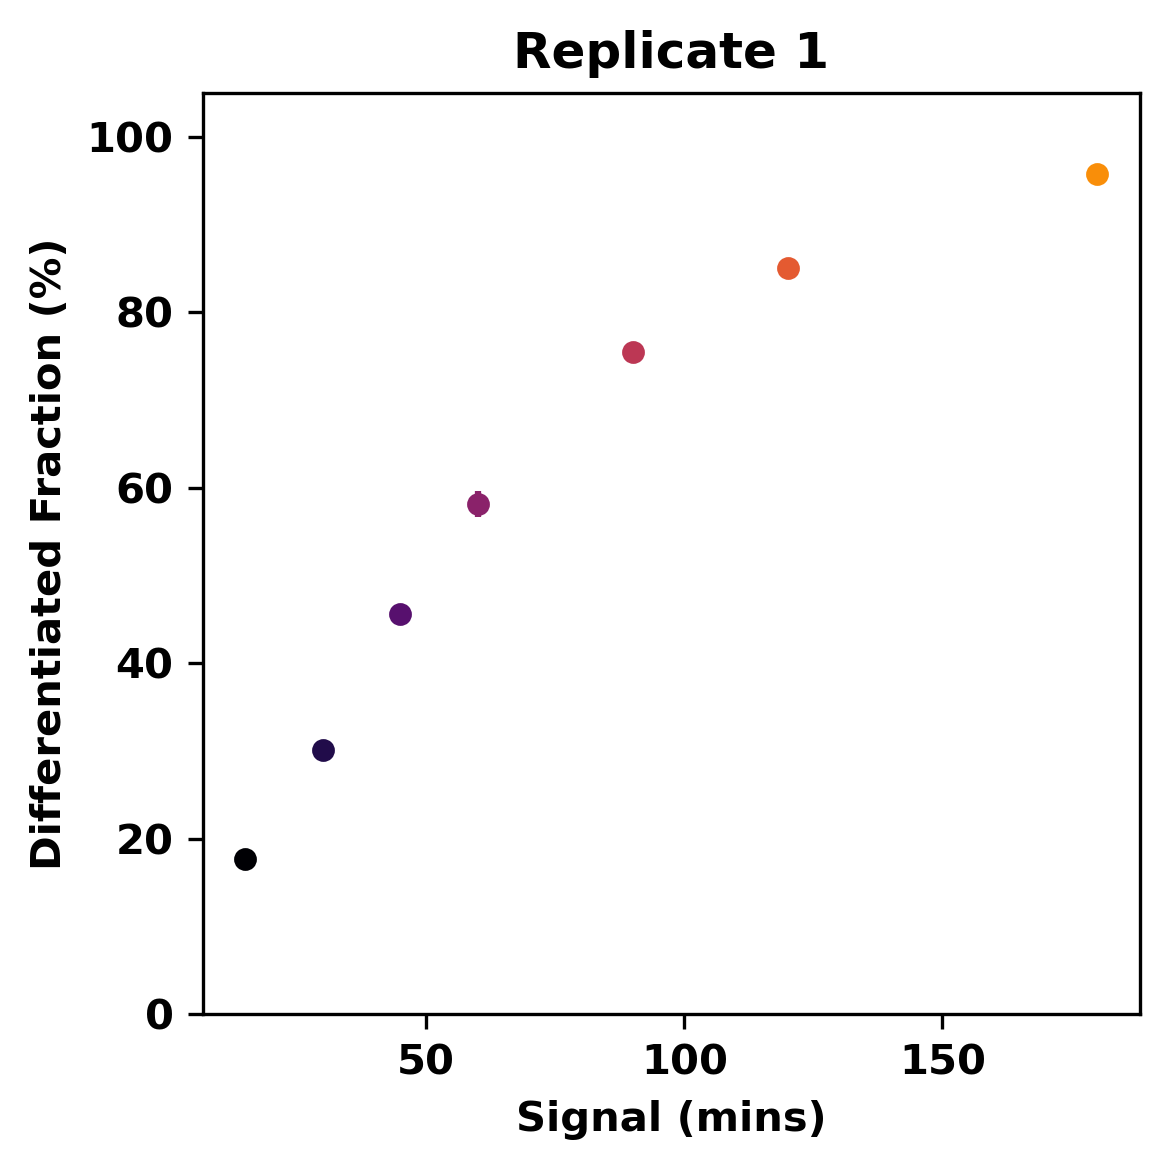

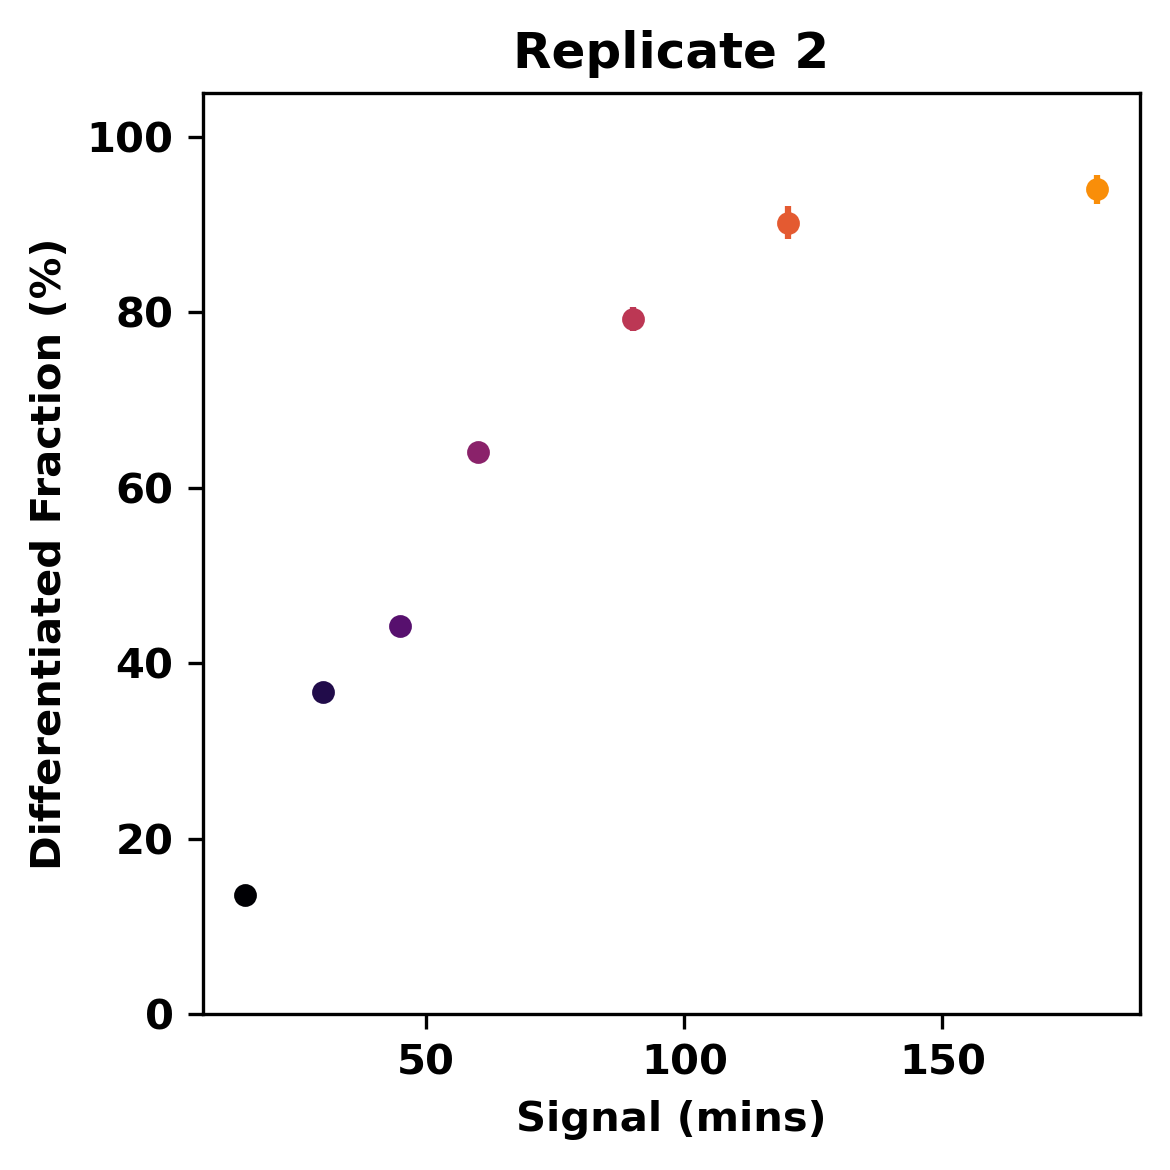

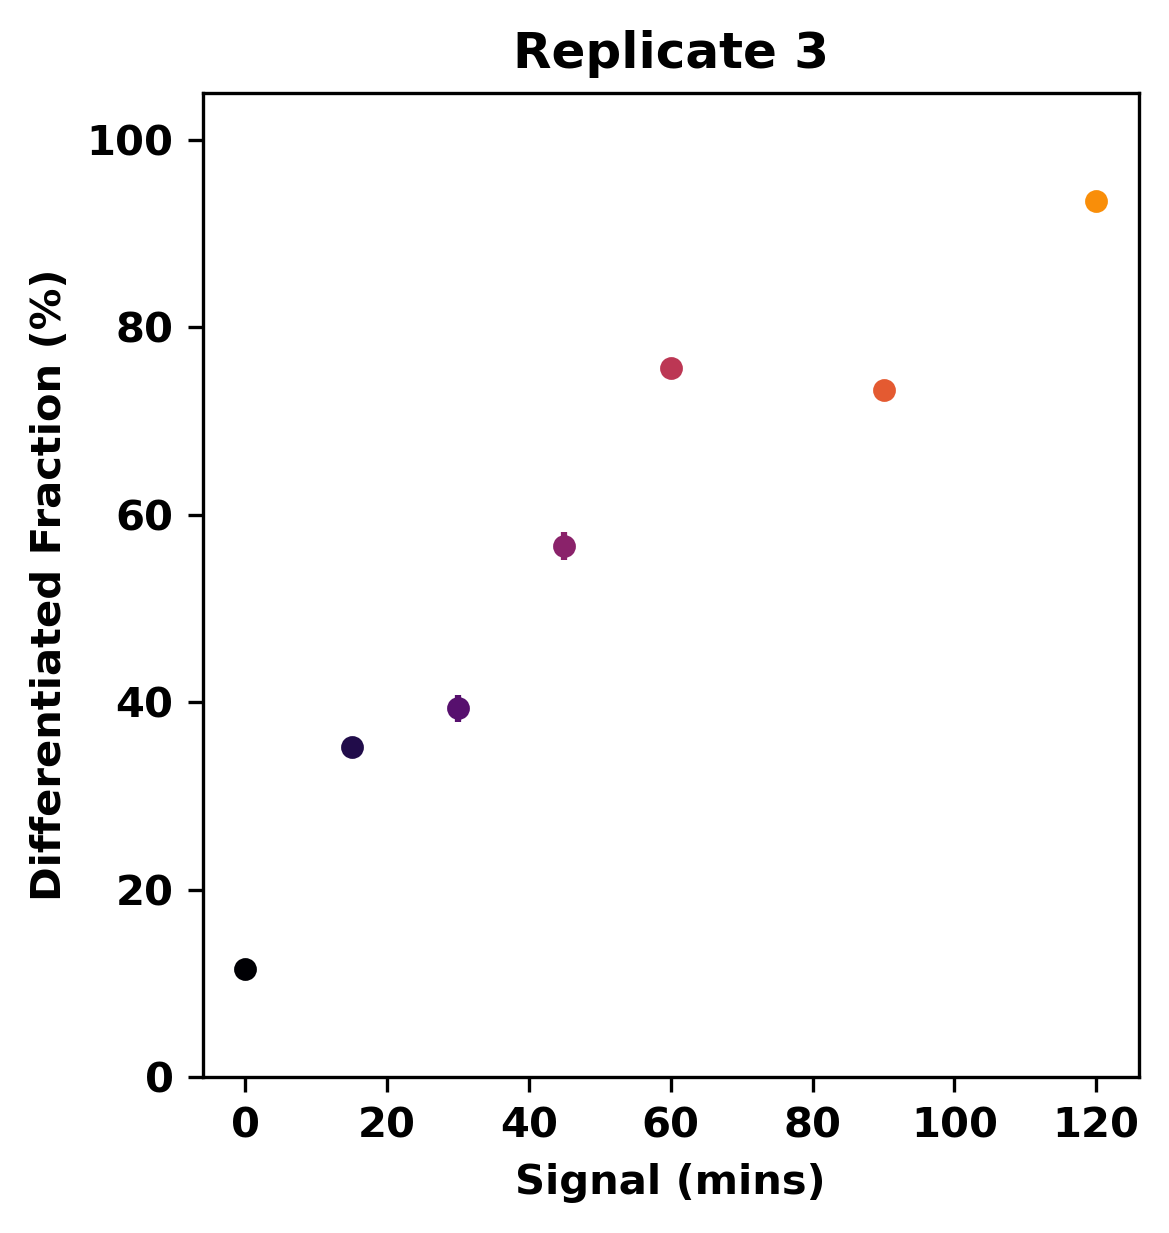

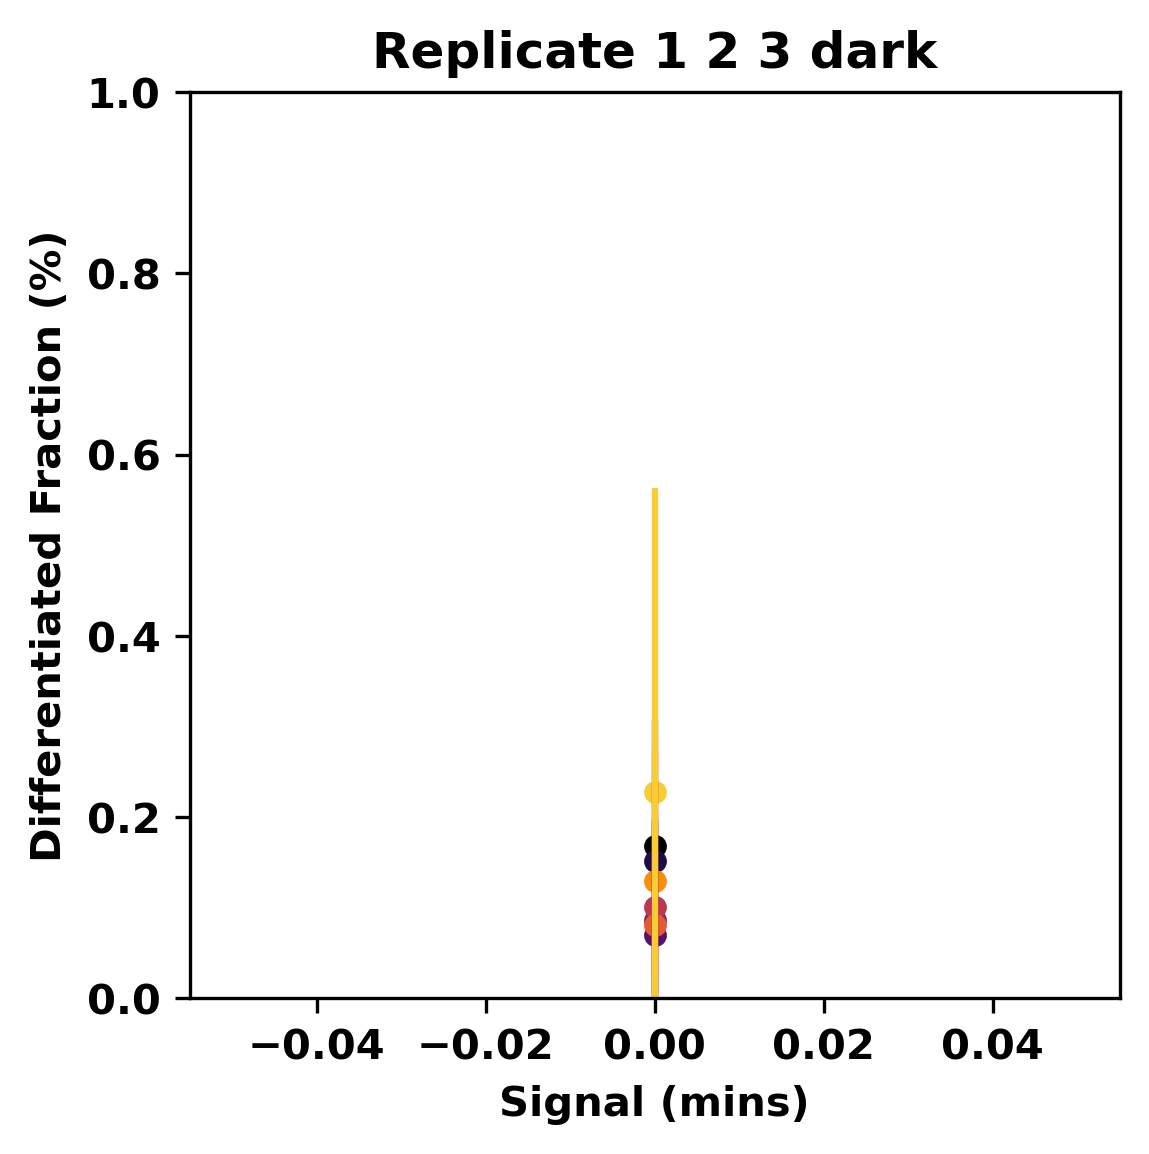

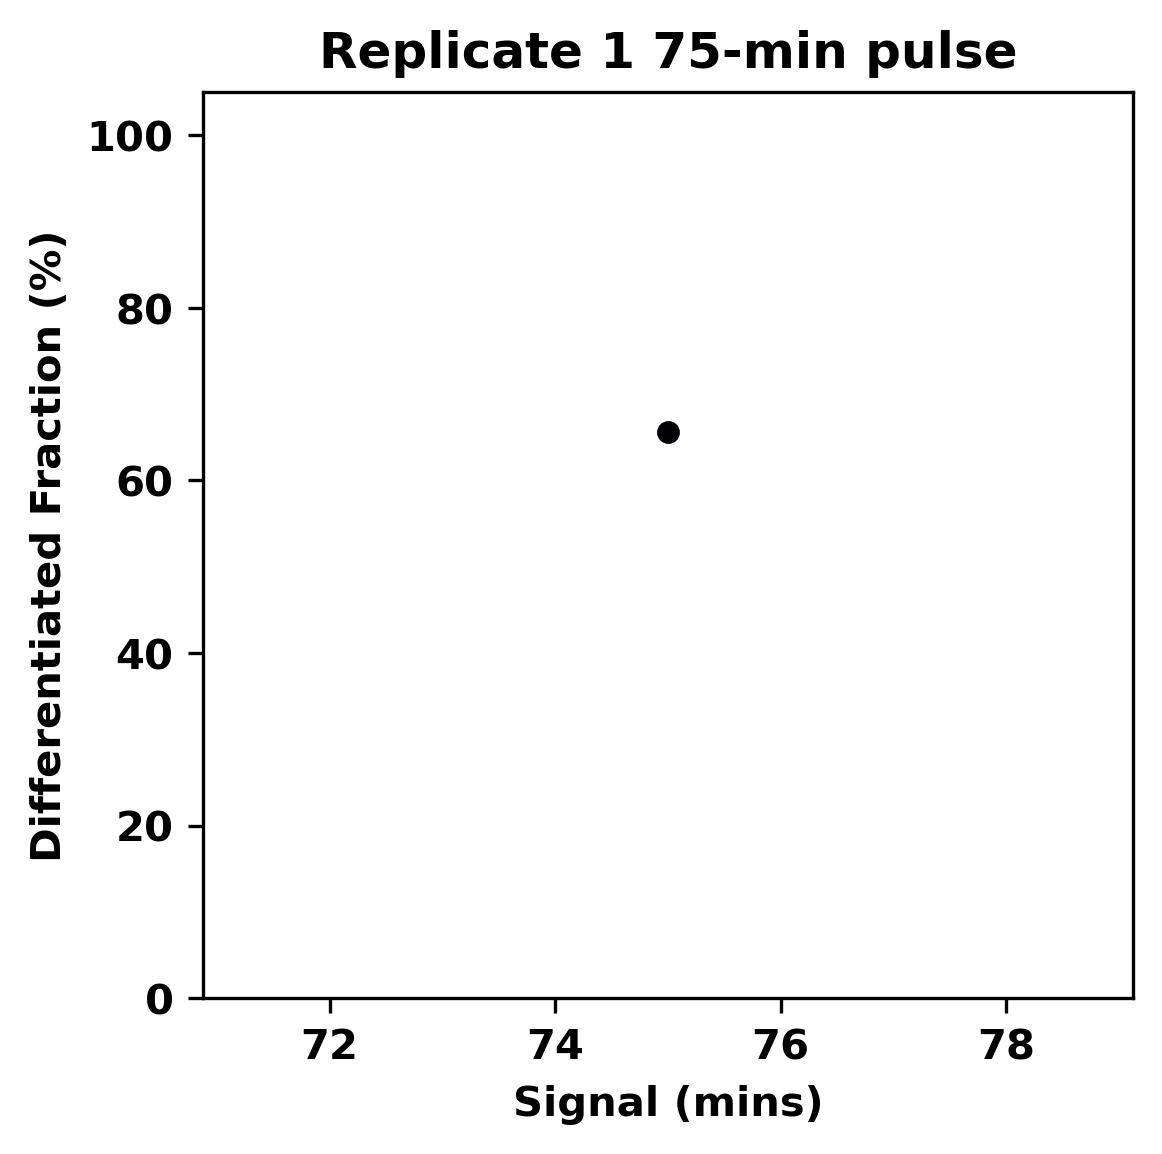

In [5]:
thresh_mc = 10
thresh_mn = 100
thresh_fp = [10, 200,50,100]

fps = ['GRN-V-HLin','GRN-B-HLin','SSC-HLin']
fps = ['mCerulean','mNeonGreen','SSC-HLin']



evenly_spaced_interval = np.linspace(0, 1,9)
colors = [plt.cm.inferno(x) for x in evenly_spaced_interval]
# colors[0] = 'k'
fig, (ax1) = plt.subplots(1,1,figsize=(4, 4), dpi=300, facecolor='w', edgecolor='k')
thresh1 = 0.5
thresh2 = 0.5
ind = [15,30,45,60,90,120,180]
zz1 = []
pp1 =[]
for jj,rid in enumerate([1,2,3,4,5,6,7]): #experiment 1 minus dark reactor (reactor8)

    z,p =rec_multi_vessel_duty(fig,all_data0[rid],colors[jj],ind[jj],t_start = 24,t_stop = 30,t_del = [])
    zz1.append(z)
    pp1.append(p)
ax1.set_title('Replicate 1')

fig.tight_layout()

fig, (ax1) = plt.subplots(1,1,figsize=(4, 4), dpi=300, facecolor='w', edgecolor='k')
ind = [15,30,45,60,90,120,180]
zz2 = []
pp2 =[]
for jj,rid in enumerate([1,2,3,4,5,6,7]): #experiment 2 minus continuous light (reactor 8)
    print(rid)
    z,p =rec_multi_vessel_duty(fig,all_data[rid],colors[jj],ind[jj],t_start =9,t_stop = 18,t_del = [])
    zz2.append(z)
    pp2.append(p)
ax1.set_title('Replicate 2')
fig.tight_layout()

fig, (ax1) = plt.subplots(1,1,figsize=(4, 4), dpi=300, facecolor='w', edgecolor='k')
ind = [0,15,30,45,60,90,120,180]
zz3 = []
pp3 =[]
for jj,rid in enumerate([5,7,1,2,3,4,6]):#experiment 3 minus 75 min pulse (reactor 8)

    z,p =rec_multi_vessel_duty(fig,all_data1[rid],colors[jj],ind[jj],t_start =8,t_stop = 12,t_del = [])
    zz3.append(z)
    pp3.append(p)
fig.tight_layout()
ax1.set_title('Replicate 3')

fig, (ax1) = plt.subplots(1,1,figsize=(4, 4), dpi=300, facecolor='w', edgecolor='k')
ind = [0,0,0,0,0,0,0,0]
zz0 = []
pp0 =[]
for jj,rid in enumerate([5,7,1,2,3,4,6,8]): #Dark behaviour

    z,p =rec_multi_vessel_duty(fig,all_data1[rid],colors[jj],ind[jj],t_start =0,t_stop = 4,t_del = [])
    zz0.append(z)
    pp0.append(p)
ax1.set_title('Replicate 1 2 3 dark')
ax1.set_ylim(0,1)

fig, (ax1) = plt.subplots(1,1,figsize=(4, 4), dpi=300, facecolor='w', edgecolor='k')

ind = [75]
zz4 = []
pp4 =[]
for jj,rid in enumerate([8]):#75 minute single pulse reactor8 from experiment 3

    z,p =rec_multi_vessel_duty(fig,all_data1[rid],colors[jj],ind[jj],t_start =8,t_stop =9,t_del = [])
    zz4.append(z)
    pp4.append(p)
    
ax1.set_title('Replicate 1 75-min pulse')


[0.12675907231460007, 14.297248329188314, 34.00195966118508, 43.07870772279474, 59.633732127386985, 76.7899022055578, 82.87632852748419, 94.43024506325601, 65.60766515380736]
[0.05008075859764822, 2.5556084200371436, 2.8266073137329157, 2.686929234133398, 3.2133291307979635, 1.7502406411170066, 7.054971095481385, 0.9598169777712393, 0.0]
{0: 0.12675907231460007, 15: 14.297248329188314, 30: 34.00195966118508, 45: 43.07870772279474, 60: 59.633732127386985, 90: 76.7899022055578, 120: 82.87632852748419, 180: 94.43024506325601, 75: 65.60766515380736}
        Mean        SD
0   0.126759  0.050081
1  34.001960  2.826607
2  59.633732  3.213329
3  76.789902  1.750241
4  82.876329  7.054971
5  94.430245  0.959817


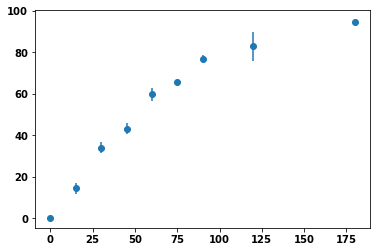

In [6]:
zz =[np.mean(zz0)] + [np.mean([x,y,z]) for x,y,z in zip(zz1,zz2,zz3)] +zz4
pp = [np.std(zz0)] +[np.std([x,y,z]) for x,y,z in zip(zz1,zz2,zz3)] +pp4
print(zz)
print(pp)
ind = [0,15,30,45,60,90,120,180,75]
comp = [0,30,60,90,120,180]
plt.scatter(ind, zz)
plt.errorbar(ind,zz,yerr = pp , linestyle = 'None')
md = {}
sd = {}
for jj,pulse in enumerate(ind):
    md[pulse] = zz[jj]
    sd[pulse] = pp[jj]
print(md)

kk = [md[i] for i in ind if i in comp]
sdk = [sd[i] for i in ind if i in comp]
cont_data = pd.DataFrame()
cont_data['Mean'] = kk
cont_data['SD'] = sdk
print(cont_data)
cont_data.to_csv('../processed_data' +'/cont_pulse_data.csv')

In [7]:


def fitted_data_ss(data):
    t= np.unique(np.array(data.cells['rel_time_hrs']))
    
    t_span = []
    ol_tp = 0
    u = 0
    for jj,tp in enumerate(data.LEDs_changes['rel_time_hrs']):
        if tp<np.max(t):
            t_span.append((ol_tp,tp,u))
            ol_tp = tp
            u = data.LEDs_changes['intensity'][jj]/40
        else:
            pass
    t_span.append((ol_tp,np.max(t),u))
    
    
    return(t,t_span);

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def fitting(params,inits,t_data,t_span,model):
    
    # solve ODE
    z0 = inits
    g = []
    p=[]
    nt = []
    t_fit = []
    for count,tuples in enumerate(t_span):
        t_eval = []
        tspan = (tuples[0],tuples[1])

        for tp in t_data:
            if ((tp>tuples[0]) and (tp<tuples[1])):
                t_eval.append(tp)
                t_fit.append(tp)
        t_eval.append(tuples[1])
        t_fit.append(tuples[1])
        u = tuples[2]

        
        z = solve_ivp(model,tspan,np.asarray(z0),t_eval = t_eval,args=(params,u))
        if count !=len(t_span)-1:

            nt.append(z.y[0][0:-1] +z.y[1][0:-1])
            g.append(z.y[0][0:-1])
            p.append(z.y[1][0:-1])
        else:

            nt.append(z.y[0] +z.y[1])
            g.append(z.y[0])
            p.append(z.y[1])
        z0 = [z.y[0][-1],z.y[1][-1]]
            ########################## Calculating fractions and plotting them with growth rate on the other axis #################   
    nr = np.concatenate(p, axis=0 )/np.concatenate( nt, axis=0 )
    return(nr*100,t_fit)

def multi_cost_mexp(params,pulses,t_spans,t_data,mean_data,inits):
    mean_sim = []
    zz = []
    for pulse in pulses:
#         print(rid)
#         print(t_dels[rid])
        S,_ = fitting(params,inits,t_data,t_spans[pulse],model)
        mean_sim.append(S[-1])
    mean_model = np.asarray(mean_sim).ravel()
    return ((mean_data-mean_model).ravel())    
        

In [8]:
def model(t,y,params,u):
    g = y[0]
    p = y[1]
    
    dgdt = g *(-params[0]*u)
    dpdt = g *(params[0]*u)
    
    dydt = [dgdt,dpdt]
    return dydt

In [9]:
paramss = [[1],[0.02],[0.5],[10],[0.1],[5],[0.001]]
n_car = 1.87*10000000 #number of cells at which OD is 1 
g0 = .5*n_car # initial number of non-differentiated cells
r0 = 0.00111
p0 =r0*g0 # initial number of differentiated cells
z0 = [g0,p0]
pulses = [0,15,30,45,60,90,120,180,75]
pulse_fit = [0,15,60,75,120]
pulse_vd = [30,45,90,180]
mean_vdata = []
std_vdata = []
t_data = np.linspace(0,20.97,21)
for pulse in pulse_vd:
    mean_vdata.append(md[pulse])
    std_vdata.append(sd[pulse])
t_spans ={0:[(0, 20.9705615, 0)]}
mean_data = [md[0]]
std_data = [sd[0]]
for jj,t in enumerate(pulse_fit[1:]):

        t_spans[t]=[(0, 8.587385787102912, 0),
         (8.587385787102912, 8.587385787102912 + t/60, 1.0),
         ( 8.587385787102912 + t/60, 20.9705615, 0.0)]
        mean_data.append(md[t])
        std_data.append(sd[t])
pars =[]
costs = []
for jj,params in enumerate(paramss):
    p = lsq(multi_cost_mexp ,params,args =(pulse_fit,t_spans,t_data,mean_data,z0),verbose = 0, max_nfev=60 )
    pars.append(p.x)  
    costs.append(p.cost)
    params1 = p.x
t_spans ={}
for jj,t in enumerate(pulse_vd):

        t_spans[t]=[(0, 8.587385787102912, 0),
         (8.587385787102912, 8.587385787102912 + t/60, 1.0),
         ( 8.587385787102912 + t/60, 20.9705615, 0.0)]
pars =[]
costs = []
for jj,params in enumerate(paramss):
    p = lsq(multi_cost_mexp ,params,args =(pulse_vd,t_spans,t_data,mean_vdata,z0),verbose = 0, max_nfev=60 )
    pars.append(p.x)  
    costs.append(p.cost)
    params2 = p.x

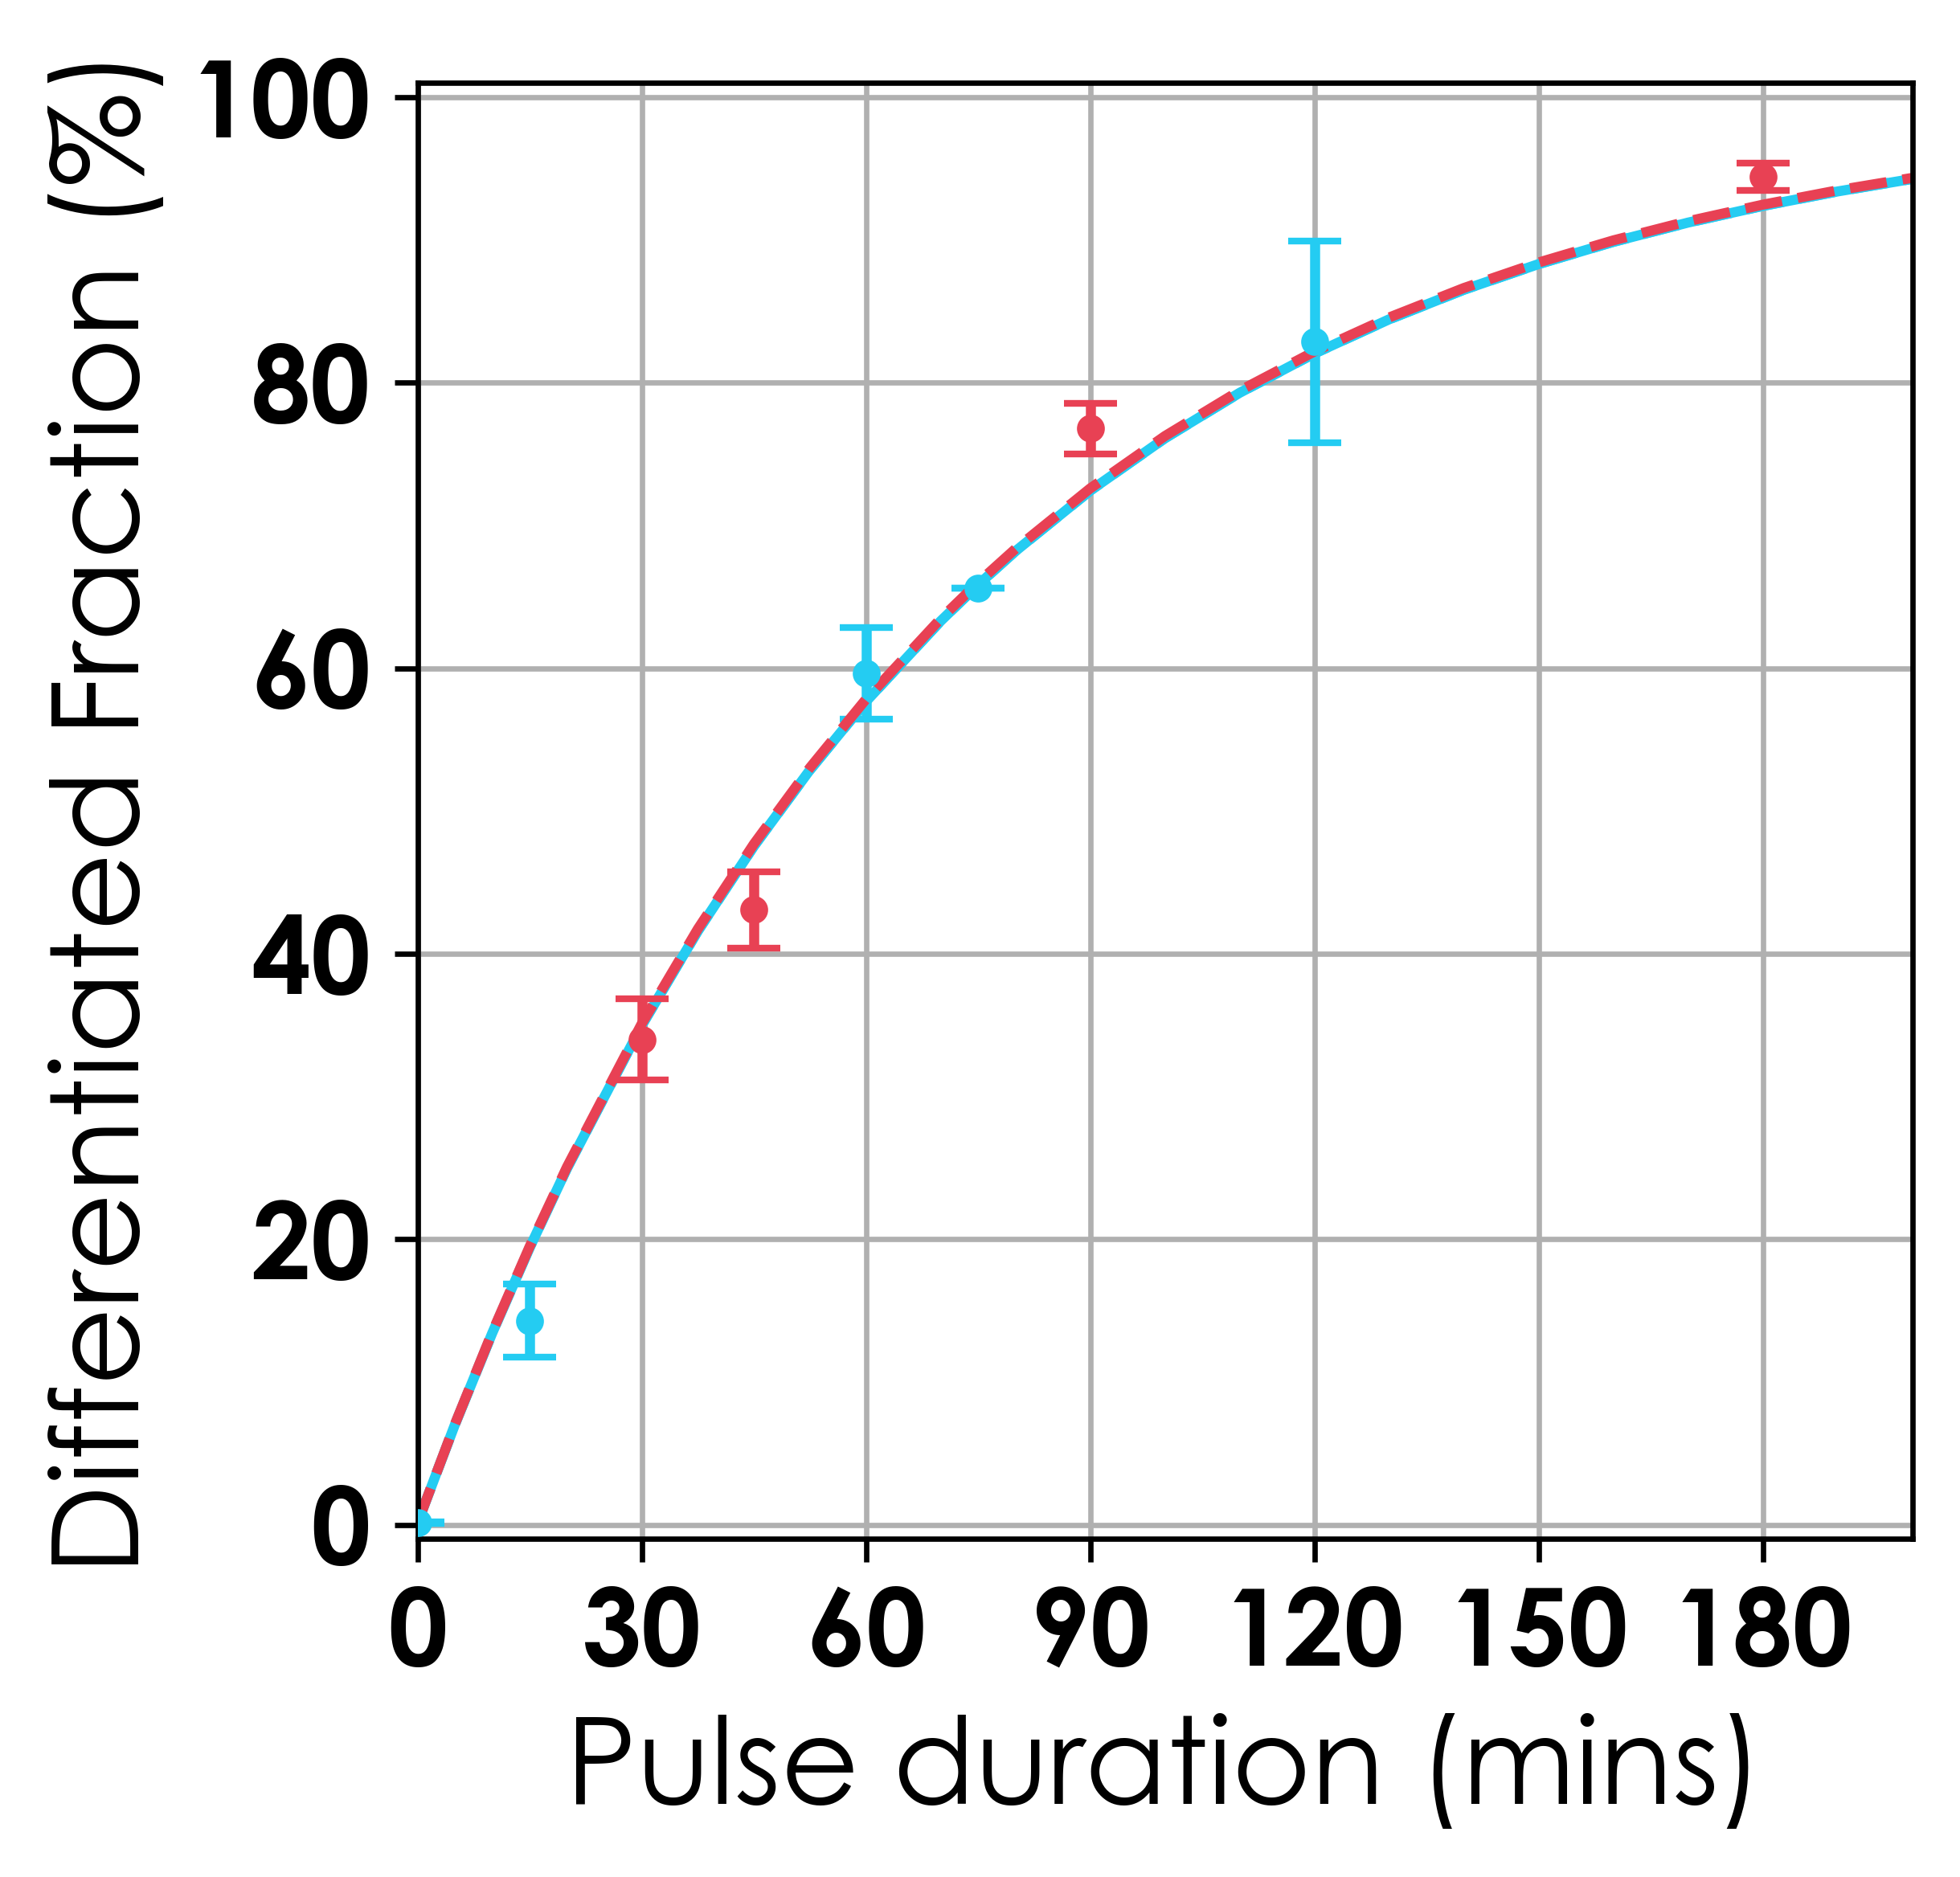

In [10]:
mean_sim = []
fs = 18
# params = p.x
fake_times  = [0,5,10,15,20,30,37.5,45,52.5,60,70,75,80,90,100,110,120,130,140,150,160,170,180,190,200,210]
t_span_fake =[[(0, 20.9705615, 0)]]
for jj,t in enumerate(fake_times[1:]):

    t_span_fake.append([(0, 8.587385787102912, 0),
     (8.587385787102912, 8.587385787102912 + t/60, 1.0),
     ( 8.587385787102912 + t/60, 20.9705615, 0.0)])

for ts in t_span_fake:

    S,_ = fitting(params1,z0,fake_times,ts,model)
    mean_sim.append(S[-1])
mean_model1 = np.asarray(mean_sim).ravel()
mean_sim = []

for ts in t_span_fake:

    S,_ = fitting(params2,z0,fake_times,ts,model)
    mean_sim.append(S[-1])
mean_model2 = np.asarray(mean_sim).ravel()

sz = 10
fit_color = '#24ccf2'
v_color = '#e84154'
fig, (ax1) = plt.subplots(1,1,figsize=(4,4), dpi=600, facecolor='w', edgecolor='k')
ax1.scatter(pulse_fit,mean_data,color =fit_color,s =sz,label = 'Data:Fit 1',zorder = 1000)
ax1.errorbar(pulse_fit,mean_data,yerr= std_data,color =fit_color,capsize = 4,linestyle = 'None')
ax1.plot(fake_times,mean_model1,'-', color = fit_color)

ax1.plot(fake_times,mean_model1,'--', color = fit_color,label ='Model:Fit 1= %0.3f' %params1 +'h$^{-1}$')

ax1.scatter(pulse_vd,mean_vdata,color =v_color,s = sz,label = 'Data:Fit 2',zorder = 1000)
ax1.errorbar(pulse_vd,mean_vdata,yerr= std_vdata,color =v_color,capsize = 4,linestyle = 'None')

ax1.plot(fake_times,mean_model2,ls = '--', color = v_color,label ='Model:Fit 2= %0.3f ' %params2 + 'h$^{-1}$')

# L1 =ax1.legend(ncol = 1,fontsize=fs-6,loc = 'lower right',columnspacing = 0.5,handlelength = 1.6,handletextpad = 0.2)
# plt.setp(L1.texts, **cgfont)

ax1.set_ylim(-1,101)
ax1.grid(True)
ax1.set_xlim(0, 200)
ax1.set_ylabel('Differentiated Fraction (%)', fontsize=fs,**cgfont)
ax1.set_xlabel('Pulse duration (mins)', fontsize=fs,**cgfont)
xticks = [0,30,60,90,120,150,180]
yticks = [0,20,40,60,80,100]
ax1.set_xticks(xticks) 
ax1.set_xticklabels([str(i) for i in xticks], fontsize=fs-2,**cgfont)
ax1.set_yticks(yticks) 
ax1.set_yticklabels([str(i) for i in yticks], fontsize=fs-2,**cgfont)

plt.savefig('../plots' +'/Figure2d.eps',bbox_inches = 'tight')
plt.savefig('../plots' +'/Figure2d.png',bbox_inches = 'tight')
plt.savefig('../plots' +'/Figure2d.svg',bbox_inches = 'tight')
